# Two-Layer Neural Network with Backpropagation

This notebook demonstrates the implementation of a two-layer neural network with backpropagation. 

## Training

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_data import MnistData
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp
import os
from PIL import Image
import glob

#### Load MNIST data and initialize

In [2]:
mnist = MnistData()
(train_images, train_labels), (test_images, test_labels) = mnist.load()

model = TwoLayerNetWithBackProp(input_size=784, hidden_size=50, output_size=10)

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


#### Training 

In [3]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
learning_rate = 0.01
iter_per_epoch = int(train_images.shape[0] / 16)

for i in range(10000):
    batch_mask = np.random.choice(train_images.shape[0], 16)
    x_batch = train_images[batch_mask]
    t_batch = train_labels[batch_mask]
    
    grad = model.gradient(x_batch, t_batch)
    
    for key in ('w1', 'b1', 'w2', 'b2'):
        model.params[key] -= learning_rate * grad[key]
    
    if i % iter_per_epoch == 0:
        train_loss = model.loss(x_batch, t_batch)
        train_loss_list.append(train_loss)
        
        train_acc = model.accuracy(train_images, train_labels)
        train_acc_list.append(train_acc)
        
        test_acc = model.accuracy(test_images, test_labels)
        test_acc_list.append(test_acc)
        
        print(f'iteration: {i}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, test acc: {test_acc:.4f}')

model.save_params("appikonda_mnist_model.pkl")

iteration: 0, train loss: 2.3004, train acc: 0.1140, test acc: 0.1134
iteration: 3750, train loss: 0.5038, train acc: 0.8893, test acc: 0.8949
iteration: 7500, train loss: 0.1186, train acc: 0.9091, test acc: 0.9135


#### Visualize Model Accuracy

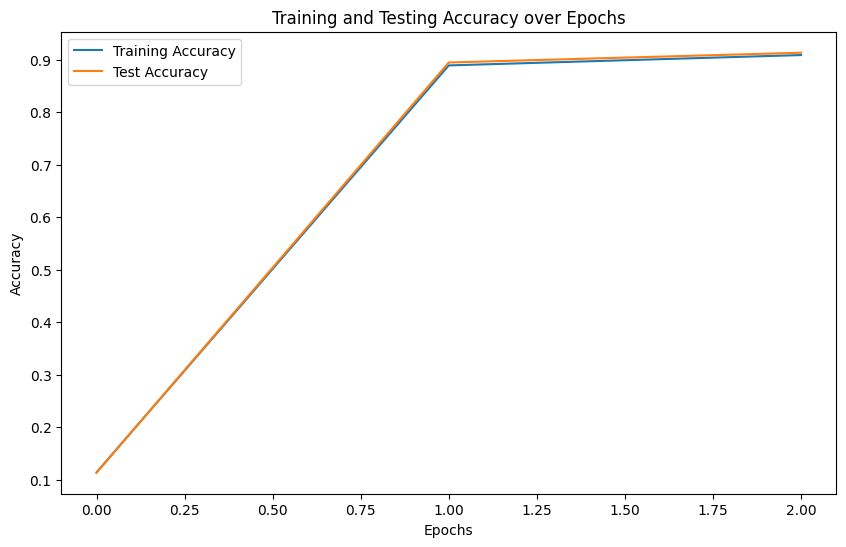

In [4]:
epochs = np.arange(0, len(train_acc_list), 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc_list, label='Training Accuracy')
plt.plot(epochs, test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

## Testing

#### Load Images for testing

In [5]:
dataset_path = "C:/Users/saadsrin/umich/ece5831-2024-assignments/05/3/Custom_MNIST_Samples"

def load_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28), Image.LANCZOS)
    img_array = np.asarray(img).astype(np.float32)
    img_array = img_array.flatten()
    img_array = (255.0 - img_array) / 255.0  
    return img_array

#### Load model

In [6]:
test_model = TwoLayerNetWithBackProp(input_size=784, hidden_size=50, output_size=10)
test_model.load_params("appikonda_mnist_model.pkl")

#### Testing 

In [7]:
folders = glob.glob(os.path.join(dataset_path, "*"))

for digit_folder in folders:
    digit_label = os.path.basename(os.path.normpath(digit_folder)).split()[-1]
    
    for img_file in glob.glob(os.path.join(digit_folder, "*.png")):        
        image_array = load_image(img_file)  
        prediction = np.argmax(test_model.predict(image_array.reshape(1, -1))) 
        if prediction == int(digit_label):
            print(f"Success: Image {os.path.basename(img_file)} for digit {digit_label} is recognized as {digit_label}.")
        else:
            print(f"Fail: Image {os.path.basename(img_file)} for digit {digit_label} but the inference result is {prediction}.")


Success: Image 0_0.png for digit 0 is recognized as 0.
Fail: Image 0_1.png for digit 0 but the inference result is 5.
Fail: Image 0_2.png for digit 0 but the inference result is 6.
Fail: Image 0_3.png for digit 0 but the inference result is 3.
Fail: Image 0_4.png for digit 0 but the inference result is 9.
Success: Image 1_0.png for digit 1 is recognized as 1.
Fail: Image 1_1.png for digit 1 but the inference result is 5.
Fail: Image 1_2.png for digit 1 but the inference result is 0.
Success: Image 1_3.png for digit 1 is recognized as 1.
Fail: Image 1_4.png for digit 1 but the inference result is 5.
Fail: Image 2_0.png for digit 2 but the inference result is 5.
Fail: Image 2_1.png for digit 2 but the inference result is 8.
Fail: Image 2_2.png for digit 2 but the inference result is 1.
Fail: Image 2_3.png for digit 2 but the inference result is 8.
Success: Image 2_4.png for digit 2 is recognized as 2.
Fail: Image 3_0.png for digit 3 but the inference result is 8.
Fail: Image 3_1.png for 